# A07 - [Project: Bicycle Sharing](https://dtkaplan.github.io/DataComputingEbook/project-bicycle-sharing.html#project-bicycle-sharing)
Kaplan, Daniel & Matthew Beckman. (2021). _Data Computing_. 2nd Ed. [Home](https://dtkaplan.github.io/DataComputingEbook/).

---

```{admonition} Revised
19 Jun 2023
```
```{contents}
```

---

## Programming Environment

In [1]:
R.version.string
.libPaths()

library(dcData)
library(lubridate)
library(tidyverse)

[1] "R version 4.3.0 (2023-04-21)"

[1] "/Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library"


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr   1.1.2     ✔ readr   2.1.4
✔ forcats 1.0.0     ✔ stringr 1.5.0
✔ ggplot2 3.4.2     ✔ tibble  3.2.1
✔ purrr   1.0.1     ✔ tidyr   1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


---

In [2]:
# information about the location of each of the stations in the system
station_url <- 'https://mdbeckman.github.io/dcSupplement/data/DC-Stations.csv'
Stations    <- readr::read_csv(station_url)
# the rental history from 2014 Q4
#   the `Trips` data table is a random subset of 10,000 trips from the full quarterly data
#   the full data set of more than 600,000 trips can be accessed by removing `-Small` from the url
trip_url    <- 'https://mdbeckman.github.io/dcSupplement/data/Trips-History-Data-2014-Q4-Small.rds'
Trips       <- readRDS(gzcon(url(trip_url)))

Rows: 347 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): name
dbl (4): lat, long, nbBikes, nbEmptyDocks

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
Stations <-
  Stations %>%
    select(lat, long)
Stations %>%
  head()

lat,long
<dbl>,<dbl>
38.85610,-77.05120
38.85725,-77.05332
38.85640,-77.04920
38.86017,-77.04959
38.85787,-77.05949
38.86230,-77.05994


In [4]:
Trips <-
  Trips %>%
    select(sstation, estation, client, sdate, edate)
Trips %>%
  head()

sstation,estation,client,sdate,edate
<chr>,<chr>,<chr>,<dttm>,<dttm>
Braddock Rd Metro,Commerce St & Fayette St,Casual,2014-10-15 08:58:00,2014-10-15 09:04:00
10th & Florida Ave NW,21st St & Pennsylvania Ave NW,Registered,2014-12-18 09:17:00,2014-12-18 09:27:00
Eastern Market Metro / Pennsylvania Ave & 7th St SE,Potomac & Pennsylvania Ave SE,Registered,2014-10-14 18:58:00,2014-10-14 19:03:00
New Jersey Ave & R St NW,Columbia Rd & Belmont St NW,Registered,2014-10-24 18:09:00,2014-10-24 18:24:00
12th & Irving St NE,10th & Monroe St NE,Registered,2014-10-04 20:17:00,2014-10-04 20:20:00
15th & F St NE,6th & H St NE,Registered,2014-11-08 15:33:00,2014-11-08 15:40:00


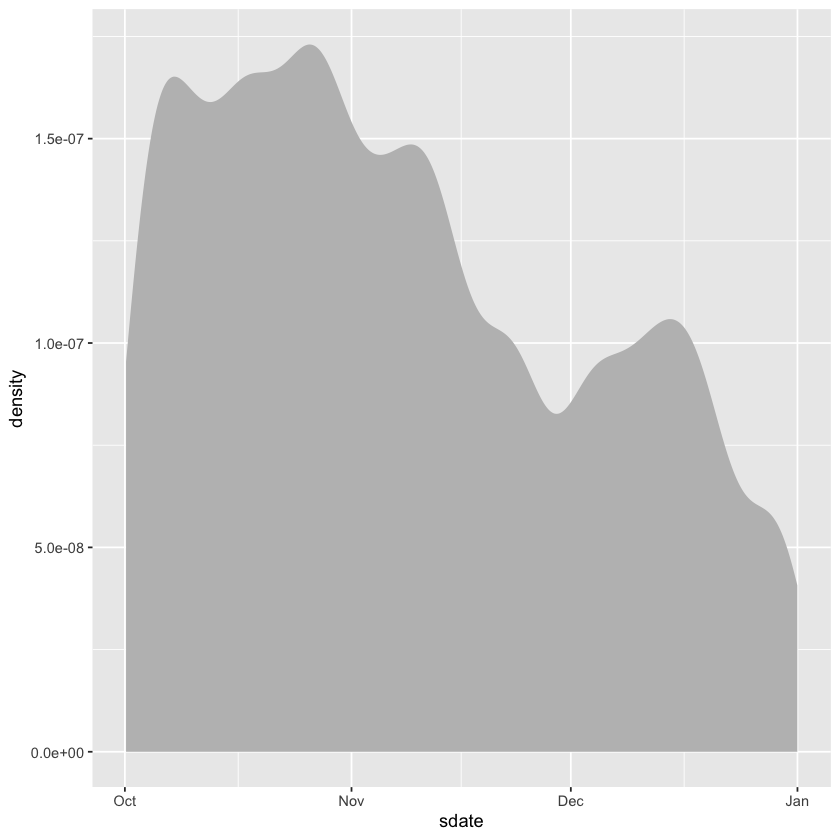

In [5]:
# the distribution of times that bikes were checked out
Trips %>%
  ggplot(aes(x = sdate)) +
    geom_density(fill = 'gray', color = NA)

## How long?

Make a box-and-whisker plot showing the distribution of the duration of rental events broken down by `client`. The duration of the rental can be calculated as `as.numeric(edate - sdate)`. The units will be in either hours, minutes, or seconds. It should not be much trouble for you to figure out which one. When you make your plot, you will likely find that the axis range is being set by a few outliers. These may be bikes that were forgotten. Arrange your scale to ignore these outliers, or filter them out.

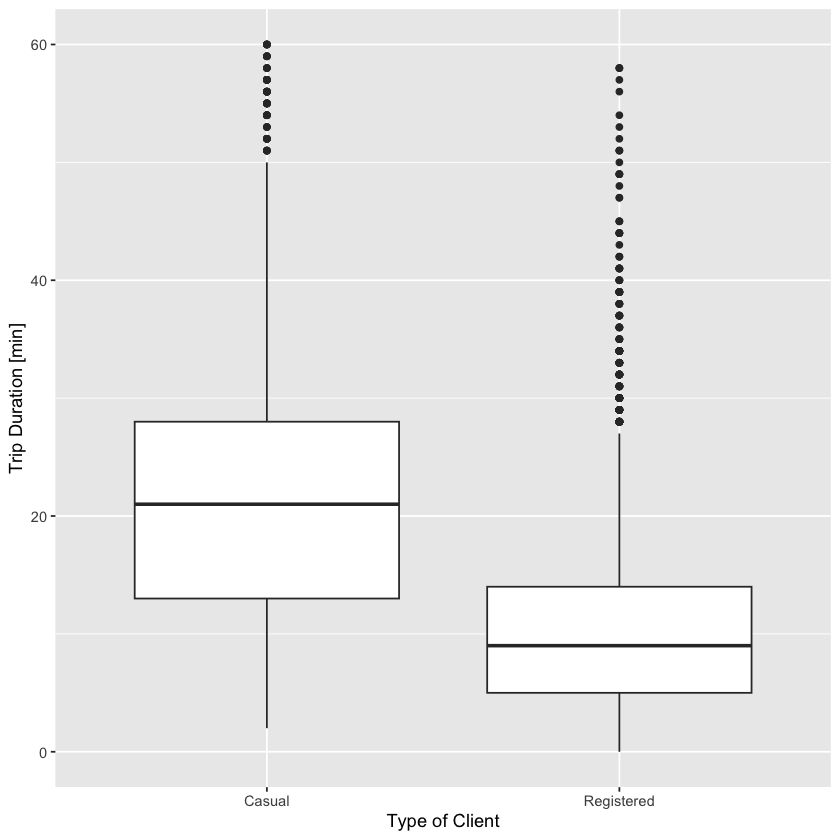

In [6]:
Trips %>%
  mutate(duration = as.numeric(edate - sdate)) %>%
  filter(duration <= 3600) %>%
  ggplot() +
    geom_boxplot(
      mapping = aes(x = client, y = duration / 60)
    ) +
    labs(x = 'Type of Client', y = 'Trip Duration [min]')

## When are bikes used?

[1] Variable `Trips$sdate` indicates the datetime that the bicycle was checked out of the station. Make histograms or density plots of each of these discrete components. Explain what each plot is showing about how bikes are checked out. For example, the distribution by hour of the day shows that few bikes are checked out before 5am, and that there are busy times around rush hour: 8am and 5pm. A similar sort of display of events per hour can be accomplished by calculating and displaying each hour's count. The graphic shows a lot of variation of bike use over the course of the day.

* Day of the year: bike rentals are highest in October; decline in November; and pick up again in the first half of December.
* Day of the week: bike rentals are fairly stable over the course of the week; Thursday and Friday see the most rentals, and Saturday and Sunday see the least. Monday sees a little bit more than Tuesday and Wednesday.
* Hour of the day: bike rentals are low before 5:00am; spike up during morning rush hour; decrease a bit throughout the day; spike back up during evening rush hour; and rapidly decline to early morning levels into the night.
* Minute of the hour: I'm not sure there's much of a trend along this scale, other than that the numbers of rentals oscillate a bit (i.e., it is not fixed).

 Now consider two additional variables: the day of the week and the client type. Group the bike rentals by three variables: hour of the day, day of the week, and client type. Find the total number of events in each grouping and plot this count versus hour. Use the `group` aesthetic to represent one of the other variables and faceting to represent the other. (Hint: utilize `facet_wrap()` in the plotting commands.) Make the same sort of display of how bike rental vary of hour, day of the week, and client type, but use `geom_density()` rather than grouping and counting. Compare the two displays--one of discrete counts and one of density--and describe any major differences.

In [31]:
Trips$sdate[1]
lubridate::yday(Trips$sdate)[1] # day of the year from 1 to 365
lubridate::wday(Trips$sdate)[1] # day of the week from Sunday to Saturday
lubridate::hour(Trips$sdate)[1] # hour of the day
lubridate::minute(Trips$sdate)[1] # minute of the hour

[1] "2014-10-15 08:58:00 UTC"

[1] 288

[1] 4

[1] 8

[1] 58

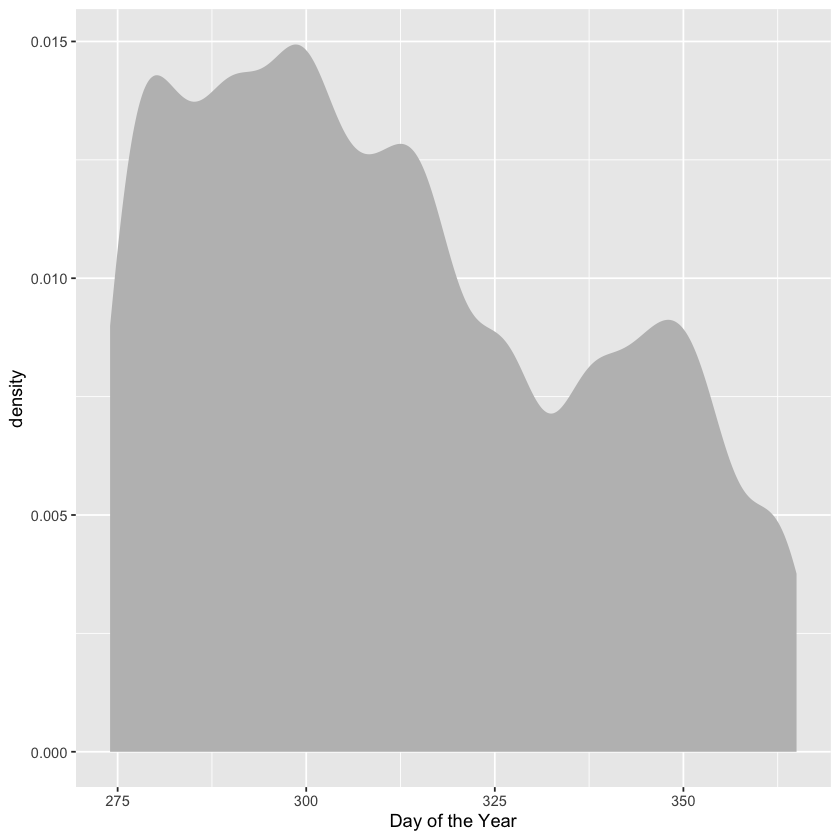

In [40]:
Trips %>%
  ggplot(aes(x = lubridate::yday(sdate))) +
    geom_density(fill = 'gray', color = NA) +
    xlab('Day of the Year')

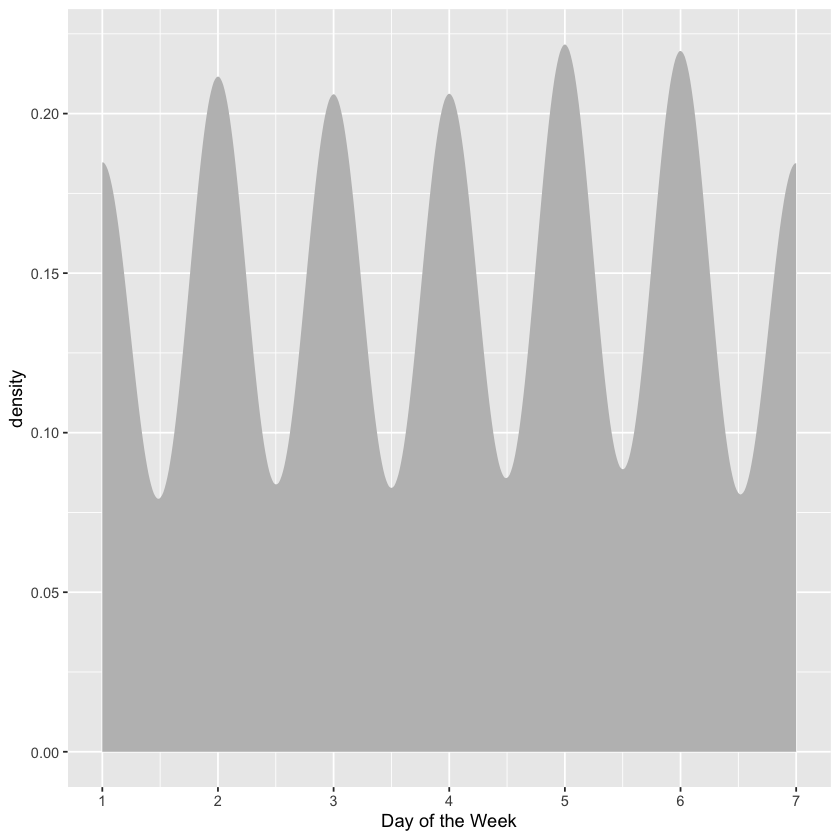

In [41]:
Trips %>%
  ggplot(aes(x = lubridate::wday(sdate))) +
    geom_density(fill = 'gray', color = NA) +
    xlab('Day of the Week') +
    scale_x_continuous(breaks = 0:8)

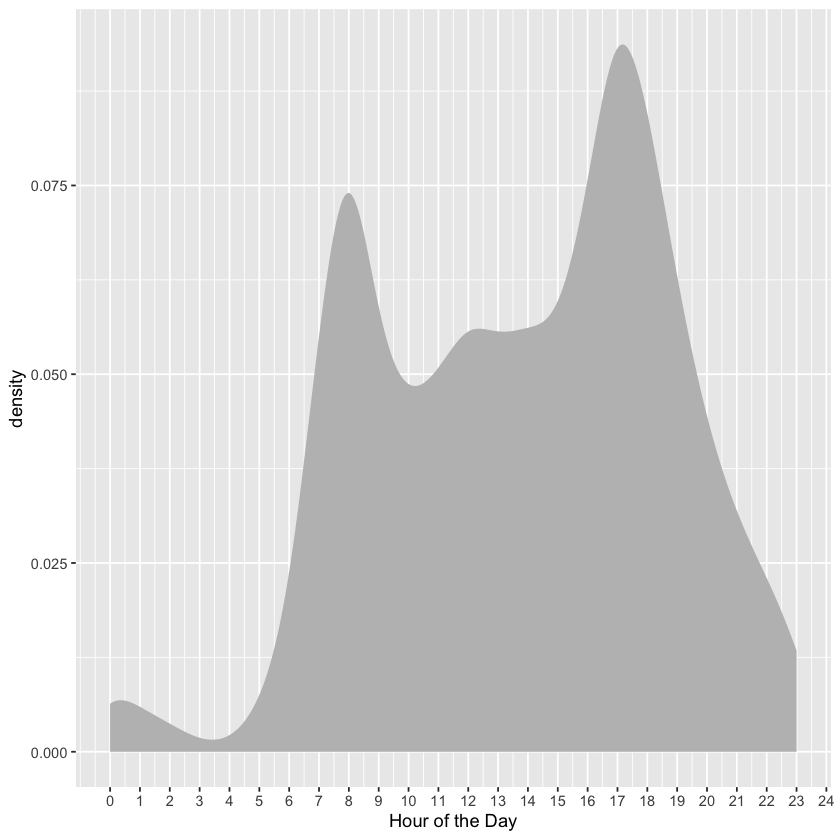

In [43]:
Trips %>%
  ggplot(aes(x = lubridate::hour(sdate))) +
    geom_density(fill = 'gray', color = NA) +
    xlab('Hour of the Day') +
    scale_x_continuous(breaks = 0:24)

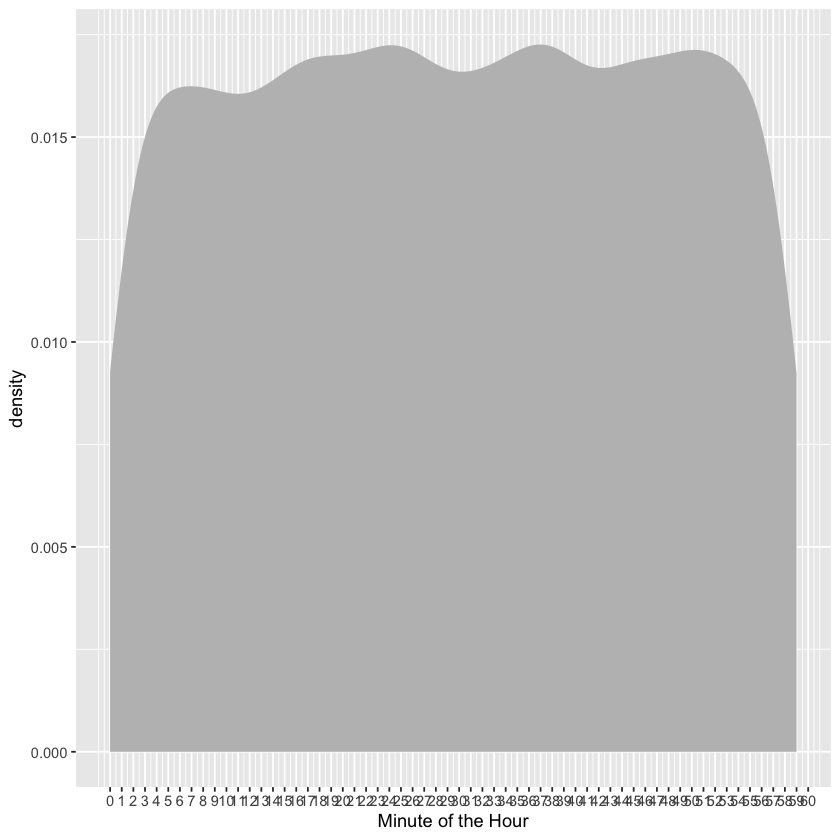

In [44]:
Trips %>%
  ggplot(aes(x = lubridate::minute(sdate))) +
    geom_density(fill = 'gray', color = NA) +
    xlab('Minute of the Hour') +
    scale_x_continuous(breaks = 0:60)

---